In [1]:
import numpy as np
import pandas as pd
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import networkx as nx
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("Flu_Classification.csv")
df.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.00,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.56,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [3]:
df.shape

(1485, 12)

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
df = convert(df, 2,12)
df_cluster = df.iloc[:,0:11]
df_cluster.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer
0,67.0,38.11,0,2,1,1,2,0,2,0,1
1,29.0,0.00,1,2,2,2,2,2,2,2,1
2,22.0,0.00,0,2,2,2,2,2,2,2,1
3,20.0,36.56,0,2,1,1,2,0,2,1,1
4,21.0,0.00,1,2,2,2,2,2,2,2,1


In [6]:
df_cluster.shape

(1485, 11)

In [7]:
# Scaling the Data
def datapreprocessing(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_normalized = normalize(df_scaled)
    df_normalized = pd.DataFrame(df_normalized)
    pca = PCA(n_components = 2)
    df_principal = pca.fit_transform(df_normalized)
    df_principal = pd.DataFrame(df_principal)
    df_principal.columns = ['P1', 'P2']
    return df_principal

In [ ]:
# df_pca = datapreprocessing(df_cluster)
# df_pca

In [ ]:
# df_pca_processed2 = np.array(df_cluster)
# plt.scatter(df_pca_processed2[:,0], df_pca_processed2[:,1], alpha=0.7, edgecolors='b')
# plt.xlabel('')
# plt.ylabel('')

In [8]:
# Working with original converted dataframe
W = pairwise_distances(df_cluster, metric="euclidean")
print(W)

[[0.000 53.920 59.054 ... 74.581 73.725 72.023]
 [53.920 0.000 7.071 ... 26.019 25.020 23.022]
 [59.054 7.071 0.000 ... 19.105 18.111 16.125]
 ...
 [74.581 26.019 19.105 ... 0.000 1.000 3.000]
 [73.725 25.020 18.111 ... 1.000 0.000 2.000]
 [72.023 23.022 16.125 ... 3.000 2.000 0.000]]


In [9]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

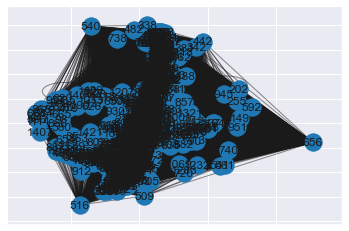

In [10]:
Graph=nx.from_numpy_matrix(W)
draw_graph(Graph)

In [11]:
adj_matrix = nx.adjacency_matrix(Graph)
print(adj_matrix.todense())

C:\Users\eveli\AppData\Local\Temp\ipykernel_17156\3417520656.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(Graph)


[[0.000 53.920 59.054 ... 74.581 73.725 72.023]
 [53.920 0.000 7.071 ... 26.019 25.020 23.022]
 [59.054 7.071 0.000 ... 19.105 18.111 16.125]
 ...
 [74.581 26.019 19.105 ... 0.000 1.000 3.000]
 [73.725 25.020 18.111 ... 1.000 0.000 2.000]
 [72.023 23.022 16.125 ... 3.000 2.000 0.000]]


In [12]:
D = nx.degree(Graph)
D

DegreeView({0: 1486, 1: 1483, 2: 1483, 3: 1484, 4: 1484, 5: 1483, 6: 1483, 7: 1484, 8: 1484, 9: 1484, 10: 1484, 11: 1484, 12: 1484, 13: 1484, 14: 1486, 15: 1484, 16: 1484, 17: 1484, 18: 1484, 19: 1484, 20: 1484, 21: 1486, 22: 1484, 23: 1484, 24: 1484, 25: 1484, 26: 1484, 27: 1484, 28: 1486, 29: 1484, 30: 1484, 31: 1484, 32: 1484, 33: 1484, 34: 1484, 35: 1484, 36: 1484, 37: 1484, 38: 1484, 39: 1483, 40: 1484, 41: 1486, 42: 1484, 43: 1484, 44: 1484, 45: 1484, 46: 1484, 47: 1484, 48: 1484, 49: 1484, 50: 1484, 51: 1484, 52: 1484, 53: 1484, 54: 1484, 55: 1484, 56: 1484, 57: 1486, 58: 1484, 59: 1484, 60: 1484, 61: 1486, 62: 1484, 63: 1484, 64: 1484, 65: 1484, 66: 1484, 67: 1482, 68: 1484, 69: 1484, 70: 1484, 71: 1484, 72: 1484, 73: 1484, 74: 1484, 75: 1484, 76: 1484, 77: 1484, 78: 1484, 79: 1484, 80: 1484, 81: 1484, 82: 1483, 83: 1484, 84: 1484, 85: 1484, 86: 1484, 87: 1484, 88: 1483, 89: 1484, 90: 1484, 91: 1484, 92: 1484, 93: 1484, 94: 1484, 95: 1484, 96: 1484, 97: 1484, 98: 1484, 99: 1484

In [13]:
degrees = [val for (node, val) in Graph.degree()]
degrees

[1486,
 1483,
 1483,
 1484,
 1484,
 1483,
 1483,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1486,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1486,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1486,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1483,
 1484,
 1486,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1486,
 1484,
 1484,
 1484,
 1486,
 1484,
 1484,
 1484,
 1484,
 1484,
 1482,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1483,
 1484,
 1484,
 1484,
 1484,
 1484,
 1483,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1483,
 1484,
 1482,
 1484,
 1482,
 1483,
 1484,
 1484,
 1482,
 1483,
 1484,
 1483,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1483,
 1484,
 1484,
 1483,
 1484,
 1484,
 1483,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1484,
 1483,
 1484,
 1484,
 1484,
 1483,
 1484,
 1483,
 1484,

In [14]:
# degree matrix
D = np.zeros((len(degrees), len(degrees)))
np.fill_diagonal(D, degrees)
print('degree matrix:')
print(D)
# laplacian matrix
L = D - adj_matrix
print('laplacian matrix:')
print(L)

degree matrix:
[[1486.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1483.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1483.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 1484.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 1484.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 1484.000]]
laplacian matrix:
[[1486.000 -53.920 -59.054 ... -74.581 -73.725 -72.023]
 [-53.920 1483.000 -7.071 ... -26.019 -25.020 -23.022]
 [-59.054 -7.071 1483.000 ... -19.105 -18.111 -16.125]
 ...
 [-74.581 -26.019 -19.105 ... 1484.000 -1.000 -3.000]
 [-73.725 -25.020 -18.111 ... -1.000 1484.000 -2.000]
 [-72.023 -23.022 -16.125 ... -3.000 -2.000 1484.000]]


In [18]:
e, v = np.linalg.eig(L)
e = e.real
v = v.real
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-52983.852 21581.496 16378.164 ... 1483.000 1483.000 1483.000]
eigenvectors:
[[-0.035 -0.042 0.013 ... -0.000 0.000 0.000]
 [-0.022 0.012 0.022 ... -0.007 -0.001 -0.004]
 [-0.022 0.020 0.015 ... 0.018 -0.017 -0.156]
 ...
 [-0.025 0.037 -0.002 ... -0.000 -0.000 0.000]
 [-0.024 0.037 -0.002 ... -0.000 0.000 0.000]
 [-0.024 0.036 -0.000 ... 0.000 0.000 0.000]]


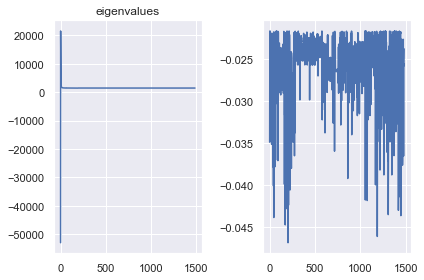

In [19]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In [20]:
U = np.array(v[:, i[0]])
km = KMeans(init='k-means++', n_clusters=2)
df['clusters'] = km.fit_predict(U)
df

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis,clusters
0,67.00,38.11,0,2,1,1,2,0,2,0,1,1,1
1,29.00,0.00,1,2,2,2,2,2,2,2,1,1,0
2,22.00,0.00,0,2,2,2,2,2,2,2,1,1,0
3,20.00,36.56,0,2,1,1,2,0,2,1,1,1,0
4,21.00,0.00,1,2,2,2,2,2,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1.40,0.00,2,2,2,2,2,2,2,2,1,0,0
1481,0.83,0.00,2,2,2,2,2,2,2,2,1,0,0
1482,3.00,0.00,2,2,2,2,2,2,2,2,1,0,0
1483,4.00,0.00,2,2,2,2,2,2,2,2,1,0,0
